In [1]:
import numpy as np
import matplotlib.pyplot as plt

def pgmread(filename):
    """  This function reads Portable GrayMap (PGM) image files and returns
    a numpy array. Image needs to have P2 or P5 header number.
    Line1 : MagicNum
    Line2 : Width Height
    Line3 : Max Gray level
    Lines starting with # are ignored """
    with open(filename, 'rb') as f:
        #header reading
        pgm_magic_num = f.readline()
        pgm_raw_size = f.readline().split()
        width = int(pgm_raw_size[0])
        height = int(pgm_raw_size[1])
        max_val = int(f.readline())

        # Read the image data
        pgm_img = np.fromfile(f, dtype=np.uint8).reshape((height, width))

    return (width, height, max_val, pgm_img)

## Import map

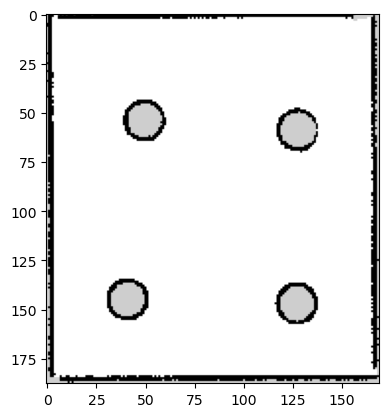

In [2]:
img = pgmread('/home/tian/mobilerobot_ws/src/localization/localization/vmegarover_samplemap.pgm')

# Display the image using matplotlib
plt.imshow(img[3], cmap="gray")
plt.show()

map_width = img[0]
map_height = img[1]
norm_map_data = img[3]/img[2]

## create frame origin

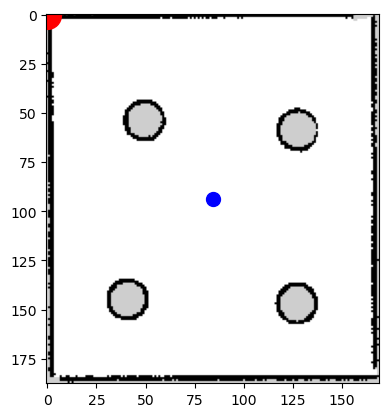

In [3]:
mapFrame_origin = np.array([0,0])
globalFrame_origin_in_map = np.array([map_width/2,map_height/2])

plt.imshow(norm_map_data, cmap="gray")
plt.plot(mapFrame_origin[0], mapFrame_origin[1], "ro", markersize = 20)
plt.plot(globalFrame_origin_in_map[0], globalFrame_origin_in_map[1], "bo", markersize = 10)
plt.show()


## Define robot position w.r.t. map frame

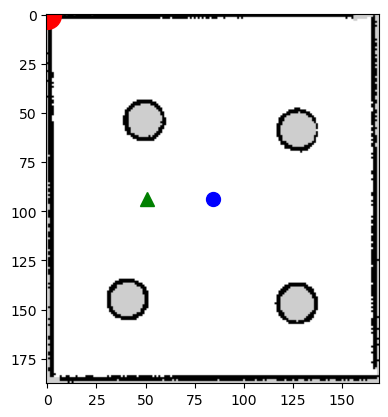

In [4]:
actual_map_width = 15
actual_map_heigth = (map_height/map_width)*actual_map_width

map_scale = map_width/actual_map_width

robotState = np.array([-3, 0, 0])
robotPosition = np.array([robotState[0], robotState[1]])
robotPosition_in_mapScale = robotPosition*map_scale

robotPosition_in_mapScale_ref_map_frame = globalFrame_origin_in_map + robotPosition_in_mapScale

plt.imshow(norm_map_data, cmap="gray")
plt.plot(mapFrame_origin[0], mapFrame_origin[1], "ro", markersize = 20)
plt.plot(globalFrame_origin_in_map[0], globalFrame_origin_in_map[1], "bo", markersize = 10)
plt.plot(robotPosition_in_mapScale_ref_map_frame[0], robotPosition_in_mapScale_ref_map_frame[1], "g^", markersize = 10)
plt.show()

## Create lidar sensors and sense function

In [5]:
lidar_max_range = 8 #[m]
lidar_sample_amount = 180
sample_per_angle = 100

def simulate_lidar_data(robotState, map_data):
    data = []
    x1, y1 = robotState[0], robotState[1]
    for angle in np.linspace(0, 2*np.pi, lidar_sample_amount, False):
        x2, y2 = (x1 + (lidar_max_range*np.cos(angle))*map_scale), (y1 + lidar_max_range*np.sin(angle)*map_scale)
        for k in range(0, sample_per_angle):
            i = k/sample_per_angle
            x = int(x2 * i + x1 * (1 - i))
            y = int(y2 * i + y1 * (1 - i))
            if 0 < x < map_width and 0 < y < map_height:
                if map_data[y][x] < 0.5: ## y is row and x is col
                    data.append([x, y])
                    break

    if len(data) > 0:
        return data
    else:
        return False



In [6]:
buffer = (simulate_lidar_data(robotPosition_in_mapScale_ref_map_frame, norm_map_data))
buffer

[[125, 137],
 [121, 138],
 [119, 140],
 [118, 143],
 [117, 146],
 [117, 150],
 [50, 139],
 [49, 138],
 [47, 137],
 [46, 136],
 [44, 135],
 [43, 135],
 [41, 135],
 [40, 135],
 [38, 135],
 [37, 135],
 [35, 136],
 [32, 139],
 [3, 168],
 [3, 163],
 [3, 158],
 [3, 154],
 [3, 149],
 [3, 146],
 [3, 142],
 [3, 139],
 [3, 136],
 [3, 133],
 [3, 130],
 [3, 128],
 [3, 125],
 [3, 123],
 [3, 121],
 [3, 118],
 [3, 116],
 [3, 114],
 [3, 112],
 [3, 111],
 [3, 109],
 [3, 107],
 [3, 105],
 [3, 103],
 [3, 102],
 [3, 100],
 [3, 98],
 [3, 97],
 [3, 95],
 [3, 94],
 [3, 92],
 [3, 90],
 [3, 89],
 [3, 87],
 [3, 85],
 [3, 84],
 [3, 82],
 [3, 80],
 [3, 78],
 [3, 76],
 [3, 75],
 [3, 73],
 [3, 71],
 [3, 69],
 [3, 66],
 [3, 64],
 [3, 62],
 [3, 59],
 [3, 57],
 [2, 53],
 [3, 51],
 [3, 48],
 [3, 45],
 [2, 40],
 [3, 37],
 [2, 32],
 [2, 27],
 [2, 23],
 [41, 61],
 [42, 61],
 [44, 63],
 [45, 63],
 [46, 64],
 [47, 64],
 [48, 64],
 [49, 64],
 [50, 64],
 [51, 64],
 [52, 64],
 [53, 64],
 [54, 64],
 [56, 62],
 [57, 61],
 [58, 6

In [7]:
lidar_data= np.array(buffer).T
lidar_data

array([[125, 121, 119, 118, 117, 117,  50,  49,  47,  46,  44,  43,  41,
         40,  38,  37,  35,  32,   3,   3,   3,   3,   3,   3,   3,   3,
          3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,
          3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,
          3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,
          3,   3,   2,   3,   3,   3,   2,   3,   2,   2,   2,  41,  42,
         44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  56,  57,
         58, 118, 117, 117, 118, 119, 121, 125],
       [137, 138, 140, 143, 146, 150, 139, 138, 137, 136, 135, 135, 135,
        135, 135, 135, 136, 139, 168, 163, 158, 154, 149, 146, 142, 139,
        136, 133, 130, 128, 125, 123, 121, 118, 116, 114, 112, 111, 109,
        107, 105, 103, 102, 100,  98,  97,  95,  94,  92,  90,  89,  87,
         85,  84,  82,  80,  78,  76,  75,  73,  71,  69,  66,  64,  62,
         59,  57,  53,  51,  48,  45,  40,  37,  32,  27,  23,  61,  61,
  

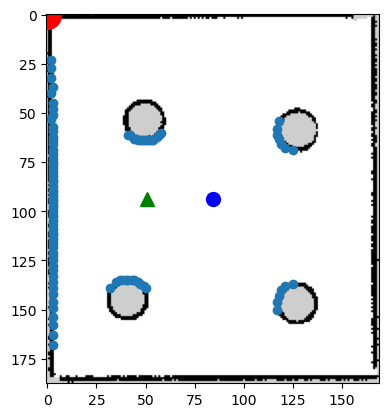

In [8]:
plt.imshow(norm_map_data, cmap="gray")
plt.plot(mapFrame_origin[0], mapFrame_origin[1], "ro", markersize = 20)
plt.plot(globalFrame_origin_in_map[0], globalFrame_origin_in_map[1], "bo", markersize = 10)
plt.plot(robotPosition_in_mapScale_ref_map_frame[0], robotPosition_in_mapScale_ref_map_frame[1], "g^", markersize = 10)
plt.scatter(lidar_data[0], lidar_data[1])
plt.show()

In [19]:
buffer = "- 4.1847028732299805- 4.20551061630249- 4.127096652984619- 4.1381072998046875- 4.157668590545654- 4.151732444763184- 4.141880989074707- 4.0789642333984375- 4.089907169342041- 4.031595706939697- 4.0643086433410645- 4.074763774871826- 4.049131870269775- 4.028421878814697- 4.001594066619873- 4.0327911376953125- 4.012550354003906- 4.014060020446777- 3.98222279548645- 3.924790143966675- 3.9126780033111572- 3.887733221054077- 3.961885690689087- 3.880824327468872- 3.937063694000244- 3.881507396697998- 3.9002573490142822- 3.9054479598999023- 3.8964850902557373- 3.8695366382598877- 3.8999969959259033- 3.8589627742767334- 3.869643211364746- 3.870453119277954- 3.8509414196014404- 3.794588088989258- 3.757099151611328- 3.8080592155456543- 3.8084733486175537- 3.8059816360473633- 3.795544385910034- 3.808988571166992- 3.740220308303833- 3.745162010192871- 3.7424063682556152- 3.8028156757354736- 3.695110559463501- 3.7356064319610596- 3.7328498363494873- 3.742018938064575- 3.776768445968628- 3.67341947555542- 3.6433968544006348- 3.7065634727478027- 3.6900858879089355- 3.6848926544189453- 3.704787492752075- 3.6232807636260986- 3.7102134227752686- 3.713280439376831- 3.680525779724121- 3.6660544872283936- 3.6683225631713867- 3.648944616317749- 3.714956045150757- 3.69331431388855- 3.655815601348877- 3.6400845050811768- 3.6893129348754883- 3.657301425933838- 3.5904765129089355- 3.6958401203155518- 3.654146432876587- 3.6746630668640137- 3.653291702270508- 3.674084186553955- 3.7019927501678467- 3.6726152896881104- 3.6826179027557373- 3.6480114459991455- 3.663271427154541- 3.676797866821289- 3.6456544399261475- 3.6057546138763428- 3.6910219192504883- 3.6521573066711426- 3.6777186393737793- 3.6060848236083984- 3.609283447265625- 3.722107410430908- 3.700345516204834- 3.6609792709350586- 3.6474947929382324- 3.6480860710144043- 3.6856768131256104- 3.6169257164001465- 3.7036292552948- 3.6194918155670166- 3.6592319011688232- 3.7179601192474365- 3.703073740005493- 3.6643412113189697- 3.6890511512756348- 3.722743511199951- 3.6759471893310547- 3.707076072692871- 3.682673931121826- 3.6702218055725098- 3.680449962615967- 3.6967110633850098- 3.7726359367370605- 3.7530341148376465- 3.6726441383361816- 3.7304348945617676- 3.7189536094665527- 3.742724895477295- 3.7285099029541016- 3.73093581199646- 3.752500057220459- 3.7268614768981934- 3.770810604095459- 3.769148588180542- 3.7507238388061523- 3.7356131076812744- 3.783143997192383- 3.7466578483581543- 3.828787088394165- 3.809162139892578"
buffer = buffer.split("- ")
buffer.pop(0)
len(buffer)

128